In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\car_data.csv")

In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
data.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [9]:
data = data.drop_duplicates()

# EDA Multi variate analysis

In [12]:
import seaborn as sns

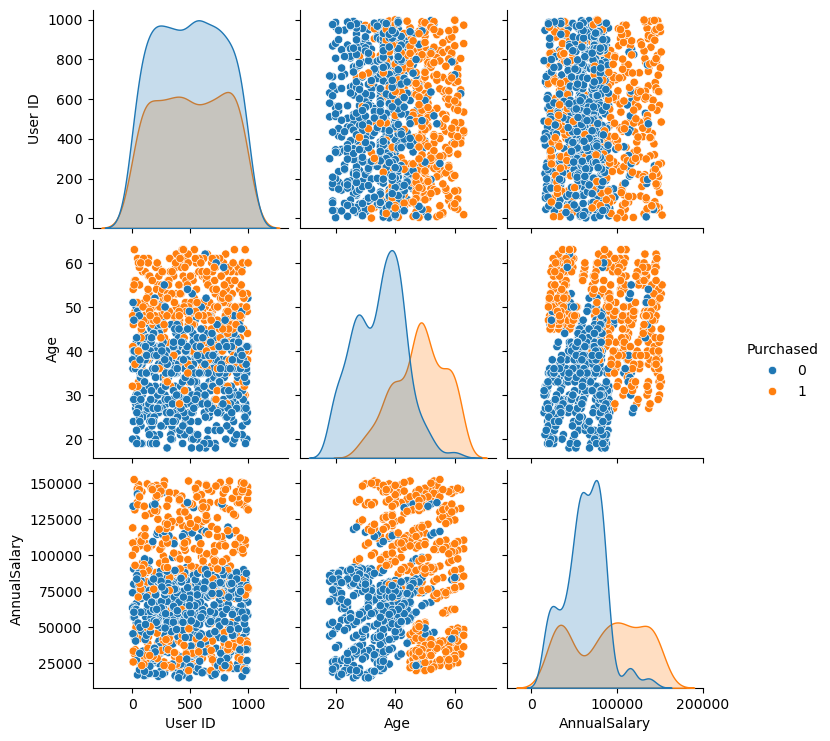

In [13]:
sns.pairplot(data , hue = 'Purchased')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
data['Gender'] = le.fit_transform(data['Gender'])

In [17]:
X = data.drop(columns=['Purchased'] , axis = 1)

In [18]:
y = data['Purchased']

# Train and Test The Model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [22]:
X_train.shape , y_train.shape

((800, 4), (800,))

In [23]:
X_test.shape , y_test.shape

((200, 4), (200,))

In [24]:
print(y.head())
print(y.unique())

0    0
1    0
2    0
3    1
4    0
Name: Purchased, dtype: int64
[0 1]


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dc = DecisionTreeClassifier(criterion='gini' , random_state=42)

In [27]:
dc.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred = dc.predict(X_test)

In [29]:
from sklearn import tree

In [30]:
data.Purchased.value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

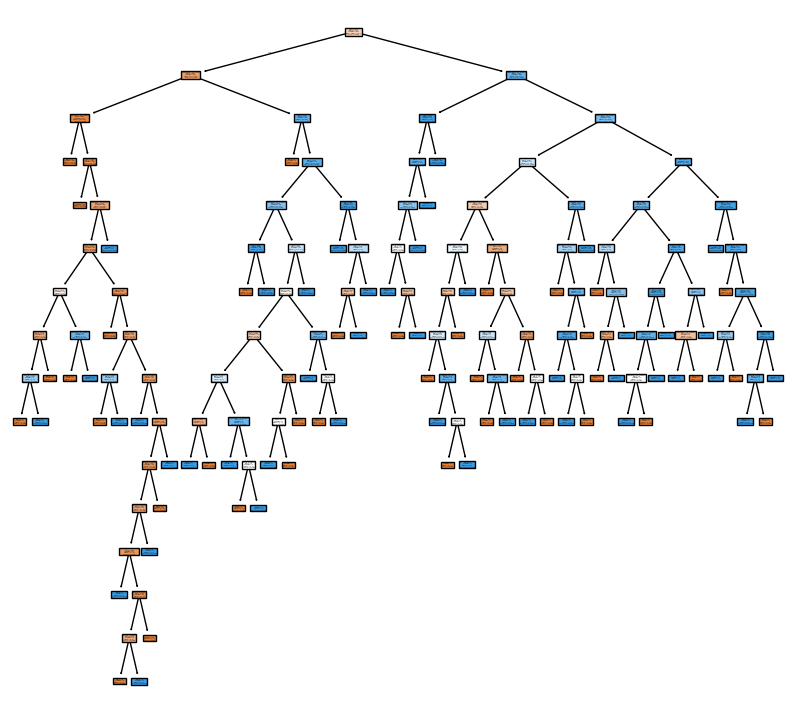

In [40]:
plt.figure(figsize=(10 , 9))

class_names = ["Survived", "Not Survived"]

tree.plot_tree(dc,
              feature_names= X.columns,
              class_names = class_names,
              filled = True)

plt.show()



# Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [44]:
ac = accuracy_score(y_pred , y_test)
print(f"ac is {ac:.2f}")

ac is 0.91


In [46]:
cm = confusion_matrix(y_pred , y_test)
print(cm)

[[105  11]
 [  7  77]]


In [48]:
cr = classification_report(y_pred , y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       116
           1       0.88      0.92      0.90        84

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [57]:
print("Features Importance Of gini Decision Tree Index")
pd.Series(dc.feature_importances_ , index = X.columns )

Features Importance Of gini Decision Tree Index


User ID         0.120371
Gender          0.015938
Age             0.458083
AnnualSalary    0.405608
dtype: float64

Features Importance Of gini Decision Tree Index


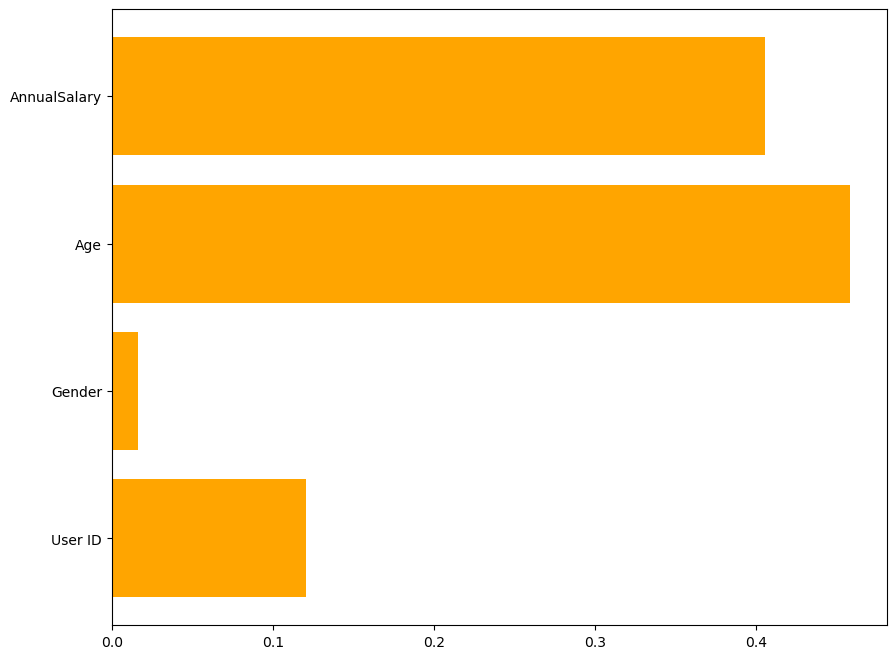

In [59]:
plt.figure(figsize=(10,8))
plt.barh(X.columns , dc.feature_importances_ , color = 'Orange')
print("Features Importance Of gini Decision Tree Index")
plt.show()

# Decision Tree Entropy

In [51]:
dt = DecisionTreeClassifier(criterion='entropy' , random_state=42)

In [52]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

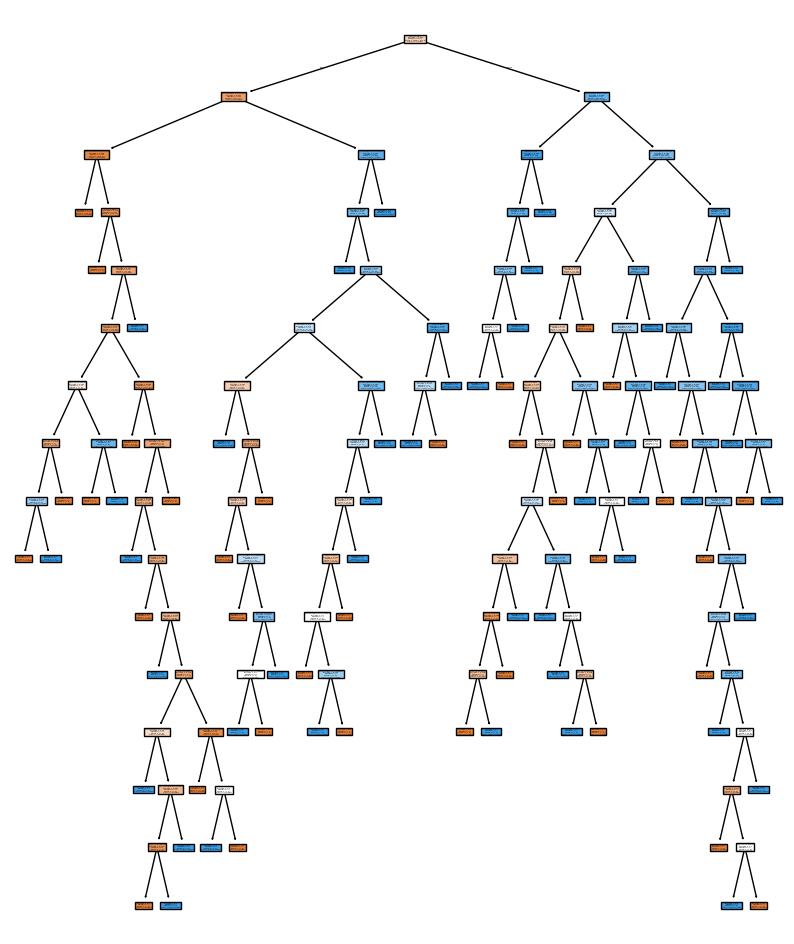

In [55]:
plt.figure(figsize=(10,12))

tree.plot_tree(dt,
              feature_names=X.columns,
               class_names=class_names,
               filled=True)
plt.show()
              
              
              

# Model Evaluation

In [60]:
y_pred_dt = dt.predict(X_test)

In [61]:
ac = accuracy_score(y_pred_dt , y_test)
print(f"ac is {ac:.2f}")

ac is 0.88


In [62]:
cm = confusion_matrix(y_pred_dt , y_test)
print(cm)

[[102  14]
 [ 10  74]]


In [63]:
cr = classification_report(y_pred_dt , y_test)
print(cr )

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       116
           1       0.84      0.88      0.86        84

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



# Feature Importance Graph

In [64]:
print("Freature Importance of entropy Index Decision Tree")
pd.Series(dt.feature_importances_ , index=X.columns)

Freature Importance of entropy Index Decision Tree


User ID         0.132233
Gender          0.018803
Age             0.386463
AnnualSalary    0.462501
dtype: float64

Freature Importance of entropy Index Decision Tree


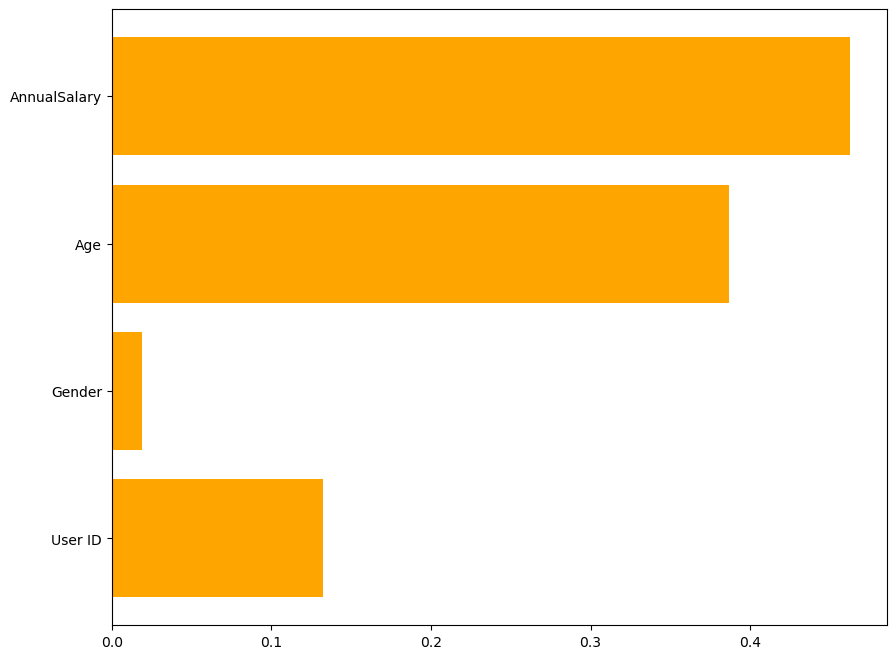

In [66]:
plt.figure(figsize=(10,8))
plt.barh(X.columns , dt.feature_importances_ , color = 'Orange')
print("Freature Importance of entropy Index Decision Tree")
plt.show()

# Essemble Model

In [67]:
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor

In [69]:
rfc = RandomForestClassifier(n_estimators=500 , criterion='entropy' , random_state=42 , oob_score=True)

In [71]:
rfc.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, oob_score=True,
                       random_state=42)

In [72]:
y_pred_rfc = rfc.predict(X_test)

In [82]:
y_pred_rfc1 = rfc.predict(X_train)

# Model Evaluation

In [83]:
acc = accuracy_score(y_pred_rfc , y_test)
print(f"acc is {acc:.2f}")

acc is 0.92


In [84]:
cm = confusion_matrix(y_pred_rfc , y_test)
print(cm)

[[106  11]
 [  6  77]]


In [85]:
cr = classification_report(y_pred_rfc , y_test)
print(cr )

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       117
           1       0.88      0.93      0.90        83

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



In [86]:
acc = accuracy_score(y_pred_rfc1 , y_train)
print(f"acc is {acc:.2f}")

acc is 1.00


In [90]:
cm = confusion_matrix(y_pred_rfc1 , y_train)
print(cm)

[[486   0]
 [  0 314]]


In [91]:
cr = classification_report(y_pred_rfc1 , y_train)
print(cr )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       314

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [92]:
print("Random Forest Feature Importance")
pd.Series(rfc.feature_importances_ , index= X.columns)

Random Forest Feature Importance


User ID         0.135127
Gender          0.022361
Age             0.420056
AnnualSalary    0.422456
dtype: float64

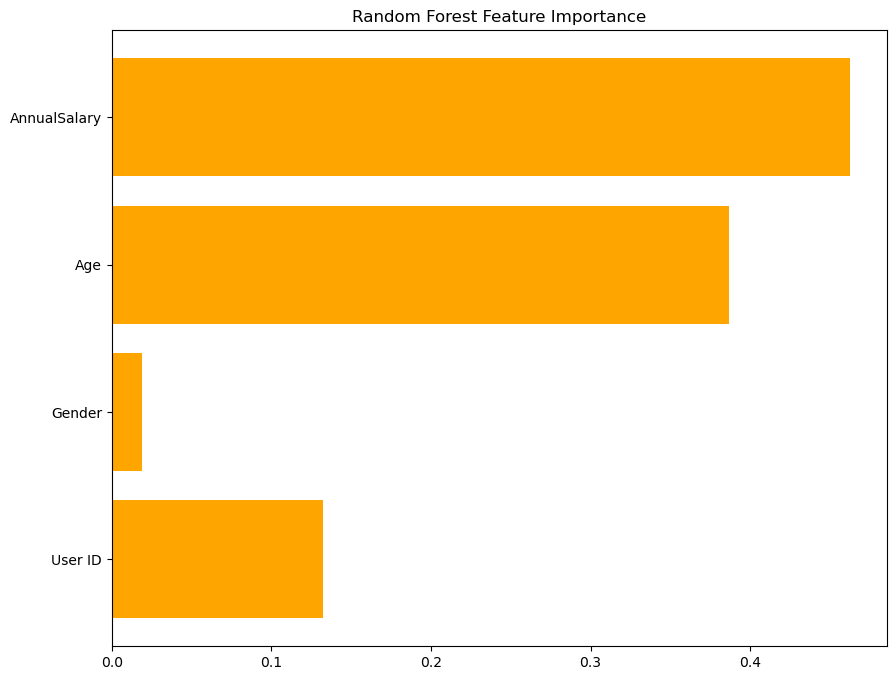

In [94]:
plt.figure(figsize=(10,8))
plt.barh(X.columns , dt.feature_importances_ , color = 'Orange')
plt.title("Random Forest Feature Importance")
plt.show()


# 3. Gradiect Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gbc = GradientBoostingClassifier(n_estimators=500 , verbose=True)

In [97]:
gbc.fit(X_train , y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2085            4.68s
         2           1.1031            2.78s
         3           1.0147            2.14s
         4           0.9417            1.96s
         5           0.8803            1.83s
         6           0.8259            1.73s
         7           0.7811            1.61s
         8           0.7421            1.55s
         9           0.7065            1.46s
        10           0.6771            1.40s
        20           0.4948            1.35s
        30           0.4228            1.22s
        40           0.3797            1.15s
        50           0.3350            1.09s
        60           0.3054            1.07s
        70           0.2824            1.04s
        80           0.2585            0.99s
        90           0.2419            0.97s
       100           0.2246            0.96s
       200           0.1257            0.83s
       300           0.0750            0.53s
       40

GradientBoostingClassifier(n_estimators=500, verbose=True)

In [98]:
y_pred_gbc = gbc.predict(X_test)

# Model Evaluation

In [99]:
acc = accuracy_score(y_pred_gbc , y_test)
print(f"acc is {acc:.2f}")

acc is 0.90


In [100]:
cm = confusion_matrix(y_pred_gbc , y_test)
print(cm)

[[106  14]
 [  6  74]]


In [101]:
cr = classification_report(y_pred_gbc , y_test)
print(cr )

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       120
           1       0.84      0.93      0.88        80

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [102]:
print("Gradient Boosting Feature Importance")
pd.Series(gbc.feature_importances_ , index=X.columns)

Gradient Boosting Feature Importance


User ID         0.092729
Gender          0.010777
Age             0.464250
AnnualSalary    0.432243
dtype: float64

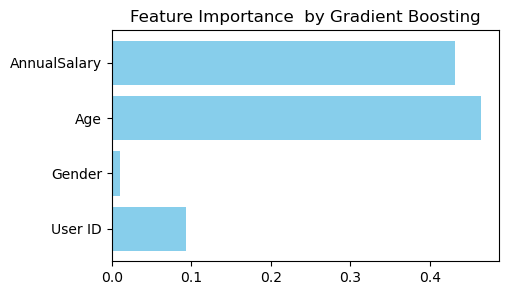

In [103]:
plt.figure(figsize=(5,3))
plt.barh(X.columns , gbc.feature_importances_ , color = 'skyblue')
plt.title("Feature Importance  by Gradient Boosting")
plt.show()